Succeeded!


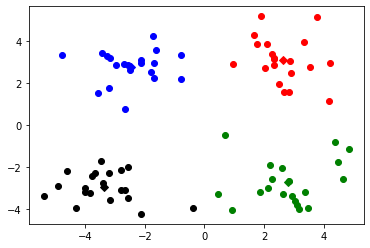

In [9]:
import numpy as np
import matplotlib.pyplot as plt
 
# 加载数据
def loadDataSet(fileName):
    data = np.loadtxt(fileName,delimiter='\t')
    return data
 
# 欧氏距离计算
def distEclud(x,y):
    return np.sqrt(np.sum((x-y)**2))  # 计算欧氏距离
 
# 为给定数据集构建一个包含K个随机质心的集合
def randCent(dataSet,k):
    m,n = dataSet.shape
    centroids = np.zeros((k,n))
    for i in range(k):
        index = int(np.random.uniform(0,m)) #
        centroids[i,:] = dataSet[index,:]
    return centroids
 
# k均值聚类
def KMeans(dataSet,k):
 
    m = np.shape(dataSet)[0]  #行的数目
    # 第一列存样本属于哪一簇
    # 第二列存样本的到簇的中心点的误差
    clusterAssment = np.mat(np.zeros((m,2)))
    clusterChange = True
 
    # 第1步 初始化centroids
    centroids = randCent(dataSet,k)
    while clusterChange:
        clusterChange = False
 
        # 遍历所有的样本（行数）
        for i in range(m):
            minDist = 100000.0
            minIndex = -1
 
            # 遍历所有的质心
            #第2步 找出最近的质心
            for j in range(k):
                # 计算该样本到质心的欧式距离
                distance = distEclud(centroids[j,:],dataSet[i,:])
                if distance < minDist:
                    minDist = distance
                    minIndex = j
            # 第 3 步：更新每一行样本所属的簇
            if clusterAssment[i,0] != minIndex:
                clusterChange = True
                clusterAssment[i,:] = minIndex,minDist**2
        #第 4 步：更新质心
        for j in range(k):
            pointsInCluster = dataSet[np.nonzero(clusterAssment[:,0].A == j)[0]]  # 获取簇类所有的点
            centroids[j,:] = np.mean(pointsInCluster,axis=0)   # 对矩阵的行求均值
 
    print("Succeeded!")
    return centroids,clusterAssment
 
def showCluster(dataSet,k,centroids,clusterAssment):
    m,n = dataSet.shape
    if n != 2:
        print("Not two-dimensional")
        return 1
 
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print("Too large k")
        return 1
 
    # 绘制所有的样本
    for i in range(m):
        markIndex = int(clusterAssment[i,0])
        plt.plot(dataSet[i,0],dataSet[i,1],mark[markIndex])
 
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    # 绘制质心
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],mark[i])
 
    plt.show()
if __name__ == '__main__':
    dataSet = loadDataSet("kmeans_data.txt")
    k = 4
    centroids,clusterAssment = KMeans(dataSet,k)
 
    showCluster(dataSet,k,centroids,clusterAssment)